# The X-files problem

This problem is for you to show your modeling abilities.

## Context

The limousine comes to a full stop. As the driver gets out to open the door you take a deep breath and get inside. You enter 10 Downing Street and are conducted to the usual meeting room. Inside you find the Prime Minister, accompanied by a fat, tall man and a short, deform one with long ears and an even longer nose.

>  <font color= #2B65EC> **Prime Minister**: Ah! You’re here! Great! Let me introduce my guests. This is Fidelious, Minister of Magic, and Krenk, the owner of the Gringotts Wizarding Bank. <br> </font>
> <font color= green> **You**: Uhhh, ma’am, is this a joke?  <br> </font>
> <font color= gray>  **Fidelious**: Not at all, but don’t worry, don’t sweat the details, tomorrow you won’t remember anything. Security measures, you see. <br> </font>
> <font color= orange> **Krenk**: Let’s move things along. I don’t like to be exposed to Muggles.<br> </font>
> <font color= green> **You**: What... <br> </font>
>  <font color= #2B65EC> **Prime Minister**: Our friends here seem to have run into a bit of an issue, see, some diamonds seem to have been stolen. Problem is, the only person... goblin, to have seen them is our distinguished guest, Krenk. <br> </font>
> <font color= gray>  **Fidelious**: And while the Ministry completely believes Krenk as to the diamonds’ worth, we need another person to validate his claim. Safety policies, you see. <br> </font>
>  <font color= #2B65EC> **Prime Minister**: So, since you’re the best data scientist in our country, I thought you could help. Mr. Krenk will provide you with the characteristics of the missing diamonds and we need you to create a model to value them. <br> </font>
> <font color= green> **You**: But I’m not a lapidarist.<br> </font>
>  <font color= #2B65EC> **Prime Minister**: Which is why we’re providing you with a huge dataset, containing characteristics and valuations for tens of thousands of diamonds. Now, get working. <br> </font>

Huge? Tens of thousands? You think. And I thought I was the clueless one here.

## Data

The file that contains the information can be download from: [Diamonds Dataset](https://github.com/jeasusav10/IM-Automation/blob/main/Lapidarist%20Problem/diamonds_data.csv)

## Code

In general terms, the goal was to <font color= red> **create a prediction model** </font>

The code will use **Tensorflow** for creating the model, **Pandas** for data maniupulation and anlaysis, and **Matplotlib/Seaborn** for data visualization.

### Import Data

The first was importing the data and libraries required.

In [1]:
#Install tensorflow - uncomment if required
#!pip install tensorflow 

In [2]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [3]:
#Import data
path = 'diamonds_data.csv'
df = pd.read_csv(path)

In [4]:
#Last five rows
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53925,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53926,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53927,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53928,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53929,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


### Data Overview

It was nescesary to revise which parameters have *Null/NaN values*, in order to replace the *damaged* entries.

In [5]:
#General information of the parameters
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53930 non-null  float64
 1   cut      53930 non-null  object 
 2   color    53930 non-null  object 
 3   clarity  53930 non-null  object 
 4   depth    53930 non-null  float64
 5   table    53930 non-null  float64
 6   price    53930 non-null  int64  
 7   x        53930 non-null  float64
 8   y        53930 non-null  float64
 9   z        53930 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In this case, the dataset did not contain null values.

However, the algorithms for **prediction models** require numeric data. In the dataset, there were three non-numeric parameters (**cut, color, clarity**). 

So, the first step was to cast these parameters using *dummies*.

In [6]:
#Generate dummies
df = pd.get_dummies(df, prefix='', prefix_sep='')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53930 entries, 0 to 53929
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53930 non-null  float64
 1   depth      53930 non-null  float64
 2   table      53930 non-null  float64
 3   price      53930 non-null  int64  
 4   x          53930 non-null  float64
 5   y          53930 non-null  float64
 6   z          53930 non-null  float64
 7   Fair       53930 non-null  uint8  
 8   Good       53930 non-null  uint8  
 9   Ideal      53930 non-null  uint8  
 10  Premium    53930 non-null  uint8  
 11  Very Good  53930 non-null  uint8  
 12  D          53930 non-null  uint8  
 13  E          53930 non-null  uint8  
 14  F          53930 non-null  uint8  
 15  G          53930 non-null  uint8  
 16  H          53930 non-null  uint8  
 17  I          53930 non-null  uint8  
 18  J          53930 non-null  uint8  
 19  I1         53930 non-null  uint8  
 20  IF    

### Trainset & Testset

The next step was to split the data in train and test set. The dataset is quite big (**>50,000 entries**), so the rule 80/20 is not really nescesary. In cases like this, it is recommended to use more data for training, therefore, **the chosen partition were 90-10** for trainset and testset, respectively.

In [8]:
#Split in train/test sets
trainset = df.sample(frac=0.9, random_state=0)
testset = df.drop(df_train.index)

### Features & Labels

Also, it was necessary to define our ouput: **price** 

It is important to remeber:
- Features = Inputs
- Labels = Outputs

In [9]:
#Define labels and features for both sets
train_features = trainset.copy()
test_features = testset.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')

### Normalization

Normalization was required because parameters the difference in ranges was noticeable (this could cause a problem on the algorithm because it could ponderate some parameters with more weight).

For example, **depht** include two decimals, meanwhile **carat** is in the mean is below 1.

In [12]:
#Verify if normalization required
train_features.describe().transpose()[['mean', 'std']]

,mean,std
carat,0.797333,0.474182
depth,61.749031,1.433777
table,57.457851,2.236612
x,5.729558,1.121658
y,5.732860,1.139139
z,3.537737,0.706939
Fair,0.030224,0.171206
Good,0.090941,0.287528
Ideal,0.400416,0.489988
Premium,0.254692,0.435693


In [18]:
#Normalization (layer)
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [19]:
#Calculate mean and std, and store them in the normalization layer
normalizer.mean.numpy()

array([7.9733318e-01, 6.1749031e+01, 5.7457851e+01, 5.7295585e+00,
       5.7328601e+00, 3.5377374e+00, 3.0224364e-02, 9.0940930e-02,
       4.0041617e-01, 2.5469229e-01, 2.2372623e-01, 1.2621300e-01,
       1.8124318e-01, 1.7658694e-01, 2.0909822e-01, 1.5439768e-01,
       1.0048005e-01, 5.1980961e-02, 1.3948122e-02, 3.3500217e-02,
       2.4224818e-01, 1.7020005e-01, 1.5040073e-01, 2.2722872e-01,
       6.7989372e-02, 9.4484620e-02], dtype=float32)

When the layer is called it returns the input data, with each feature independently normalized.

### Linear Regression (Examples)

The idea was to generate a Deep Neural Network with a multivariate linear regreession as output layer.
This means that the goal is to predict an output based on the funcion: $y=mx +b$

Where:
- $y$ = label
- $x$ = features
- $m$ = weights learned 
- $b$ = bias learned

In order to understant the procedure, the next code lines shows the representation for:
- Linear Regression: One variable
- Linear Regression: Multiple variables 

In all cases, the features should be normalized.

In [22]:
#Example of LR for 1 feature
x = np.array(train_features['x'])

#Normalization
x_normalizer = preprocessing.Normalization(input_shape=[1,])
x_normalizer.adapt(x)

#Model
x_model = tf.keras.Sequential([x_normalizer,layers.Dense(units=1)])

#Summary
x_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_6 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


The model above will predict **price** from **x** (this is just an example of how linnear regression works).
The line below runs the untrained model on the first 10 x values.

In [24]:
#Prediction of untrained model
x_model.predict(x[:10])

array([[-0.0763154 ],
       [-0.06500017],
       [-0.2248279 ],
       [-0.17532377],
       [ 0.15564695],
       [ 0.1867639 ],
       [ 0.09765638],
       [-0.0494417 ],
       [ 0.2320248 ],
       [-0.17108051]], dtype=float32)

The next step was trainning the model, using the loss and the optimizer (Adam)for the *Gradient Descend*.

In [26]:
#Train model

#Configure the training
x_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
                loss='mean_absolute_error')

#Trainning
price_x = x_model.fit(train_features['x'], train_labels, epochs= 50,verbose=0, validation_split = 0.2)

The next line is helpful to visualize the model's training progress.

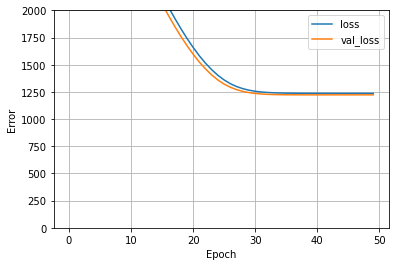

In [31]:
#Progress
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 2000])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(price_x)

Now, the idea was to evaluate model on the testset. 

As it can be in the next image, it was a good approximation, as long as the model used one variable.

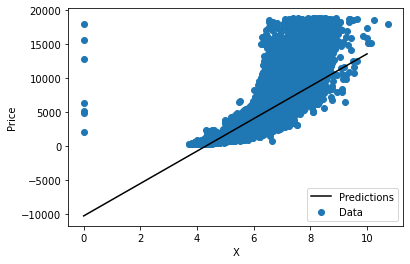

In [35]:
#Evaluate model
test_results = {}
test_results['x'] = x_model.evaluate(test_features['x'],test_labels, verbose=0)

#Predict results
x = tf.linspace(0.0, 10, 1000)
y = x_model.predict(x)

#Plot the data to compare predictions
def plot_out(x, y):
  plt.scatter(train_features['x'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('X')
  plt.ylabel('Price')
  plt.legend()
plot_out(x,y)


So, the same idea could be applied using all features (the cange is that now, m is a matrix and b is a vector). 

In [36]:
#Normalization of all features
linear_model = tf.keras.Sequential([normalizer,layers.Dense(units=1)])

In [37]:
#Model trainning
linear_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),loss='mean_absolute_error')
history = linear_model.fit(train_features, train_labels,epochs=100, verbose=0,validation_split = 0.2)

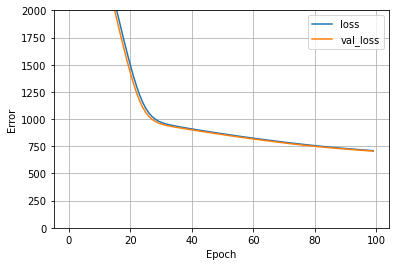

In [38]:
#Plot Loss
plot_loss(history)

In [40]:
#Model Evaluation
test_results['linear_model'] = linear_model.evaluate(test_features, test_labels, verbose=0)

### DNN 

Now, some *hidden* non-linear layers were added. In general, the model contains:
- Normalization layer.
- Two hidden, nonlinear, using the relu nonlinearity.
- A linear single-output layer.

In [41]:
#Bulding model
def build_and_compile_model(norm):
    model = keras.Sequential([norm, layers.Dense(64, activation='relu'),
                              layers.Dense(64, activation='relu'),
                              layers.Dense(1)])
    model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [45]:
#Example with variable x

#Build model
dnn_x_model = build_and_compile_model(x_normalizer)

#Train model
history = x_model.fit(train_features['x'], train_labels,
                      validation_split=0.2,verbose=0, epochs=50)

#Evaluation
test_results['x'] = dnn_x_model.evaluate(test_features['x'], 
                                        test_labels, verbose=0)


In [46]:
#Full model

#Build model
dnn_model = build_and_compile_model(normalizer)

#Train model
history = dnn_model.fit(train_features, train_labels,
                        validation_split=0.2, verbose=0, epochs=200)

#Evaluation
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

Now, the idea is to make predictions with testset.

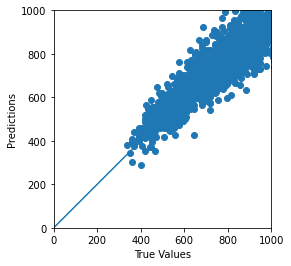

In [50]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1000]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

It can be seen that the predictions have an acceptable range of error.

### New Entries

Now the idea, was to use the model to predict the price for the **stolen items**. The first thing was to generate a pandas frame with the features.

In [127]:
#Create DataFrame of stolen items
carat = [0.71,0.83,0.5,0.39,0.32,0.9,0.51,1.12,0.4,0.36]
cut = ['Good', 'Ideal','Ideal','Premium','Premium','Good','Ideal','Ideal','Ideal','Premium']
color = ['I','G','E','J','G','F','D','G','G','I']
clarity = ['VVS2','VS1','VS2','VS1','VS1','SI2','VS1','VVS2','VVS2','VS2']
depth = depth = [63.1,62.1,61.5,61.6,62.1,63.3,60.9,62.1,62.4,62.7]
table =[58,55,55,59,56,57,57,54.8,56,59]
x = [5.64,6.02,5.11,4.67,4.43,6.08,5.2,6.64,4.72,4.54]
y = [5.71,6.05,5.16,4.71,4.4,6.14,5.17,6.66,4.74,4.58]
z = [3.58,3.75,3.16,2.89,2.74,3.87,3.16,4.13,2.95,2.86]

data = {'carat':carat, 'depth': depth,'cut':cut, 'color': color, 
        'clarity':clarity, 'table':table,'x':x,'y':y,'z':z}
stolen = pd.DataFrame(data=data)
stolen.head(10)

,carat,depth,cut,color,clarity,table,x,y,z
0,0.71,63.1,Good,I,VVS2,58.0,5.64,5.71,3.58
1,0.83,62.1,Ideal,G,VS1,55.0,6.02,6.05,3.75
2,0.50,61.5,Ideal,E,VS2,55.0,5.11,5.16,3.16
3,0.39,61.6,Premium,J,VS1,59.0,4.67,4.71,2.89
4,0.32,62.1,Premium,G,VS1,56.0,4.43,4.40,2.74
5,0.90,63.3,Good,F,SI2,57.0,6.08,6.14,3.87
6,0.51,60.9,Ideal,D,VS1,57.0,5.20,5.17,3.16
7,1.12,62.1,Ideal,G,VVS2,54.8,6.64,6.66,4.13
8,0.40,62.4,Ideal,G,VVS2,56.0,4.72,4.74,2.95
9,0.36,62.7,Premium,I,VS2,59.0,4.54,4.58,2.86


In [128]:
#Generate dummies
stolen_pred = pd.get_dummies(stolen, prefix='', prefix_sep='')
stolen_pred.columns  ^ test_features.columns

Index(['Fair', 'H', 'I1', 'IF', 'SI1', 'VVS1', 'Very Good'], dtype='object')

Some columns are missing if we compare against the test_features/train_features:
- Fair
- Very Good
- H
- I1
- IF
- SI1
- VVS1

In [129]:
#Add missing columns
stolen_pred['Fair'] = 0
stolen_pred['Very Good'] = 0
stolen_pred['H'] = 0
stolen_pred['I1'] = 0
stolen_pred['IF'] = 0
stolen_pred['SI1'] = 0
stolen_pred['VVS1'] = 0

### Predictions

The predictions of the **stolen items** are stored on the next dataset.

In [130]:
#Predictions
stolen_predictions = dnn_model.predict(stolen_pred).flatten()

In [131]:
#Visualize the results
stolen['Predictions']= stolen_predictions
stolen.head(10)

,carat,depth,cut,color,clarity,table,x,y,z,Predictions
0,0.71,63.1,Good,I,VVS2,58.0,5.64,5.71,3.58,1087.864380
1,0.83,62.1,Ideal,G,VS1,55.0,6.02,6.05,3.75,2872.855713
2,0.50,61.5,Ideal,E,VS2,55.0,5.11,5.16,3.16,750.674927
3,0.39,61.6,Premium,J,VS1,59.0,4.67,4.71,2.89,129.634094
4,0.32,62.1,Premium,G,VS1,56.0,4.43,4.40,2.74,482.053375
5,0.90,63.3,Good,F,SI2,57.0,6.08,6.14,3.87,3346.202393
6,0.51,60.9,Ideal,D,VS1,57.0,5.20,5.17,3.16,673.927246
7,1.12,62.1,Ideal,G,VVS2,54.8,6.64,6.66,4.13,3388.668945
8,0.40,62.4,Ideal,G,VVS2,56.0,4.72,4.74,2.95,571.209351
9,0.36,62.7,Premium,I,VS2,59.0,4.54,4.58,2.86,348.067993


In [135]:
#Highlight information
coldict = {'Predictions':'yellow'}
def highlight_cols(s, coldict):
    if s.name in coldict.keys():
        return ['background-color: {}'.format(coldict[s.name])] * len(s)
    return [''] * len(s)

stolen.style.apply(highlight_cols, coldict=coldict)

,carat,depth,cut,color,clarity,table,x,y,z,Predictions
0,0.710000,63.100000,Good,I,VVS2,58.000000,5.640000,5.710000,3.580000,1087.864380
1,0.830000,62.100000,Ideal,G,VS1,55.000000,6.020000,6.050000,3.750000,2872.855713
2,0.500000,61.500000,Ideal,E,VS2,55.000000,5.110000,5.160000,3.160000,750.674927
3,0.390000,61.600000,Premium,J,VS1,59.000000,4.670000,4.710000,2.890000,129.634094
4,0.320000,62.100000,Premium,G,VS1,56.000000,4.430000,4.400000,2.740000,482.053375
5,0.900000,63.300000,Good,F,SI2,57.000000,6.080000,6.140000,3.870000,3346.202393
6,0.510000,60.900000,Ideal,D,VS1,57.000000,5.200000,5.170000,3.160000,673.927246
7,1.120000,62.100000,Ideal,G,VVS2,54.800000,6.640000,6.660000,4.130000,3388.668945
8,0.400000,62.400000,Ideal,G,VVS2,56.000000,4.720000,4.740000,2.950000,571.209351
9,0.360000,62.700000,Premium,I,VS2,59.000000,4.540000,4.580000,2.860000,348.067993
